(165, 4096)
10


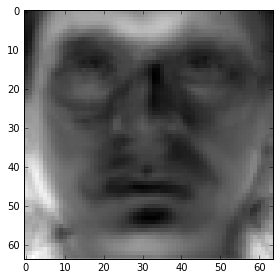

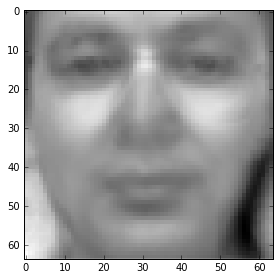

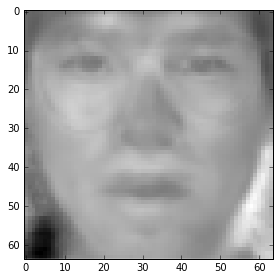

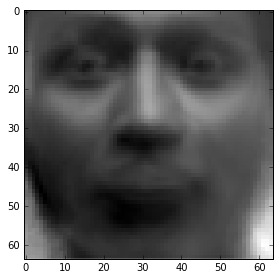

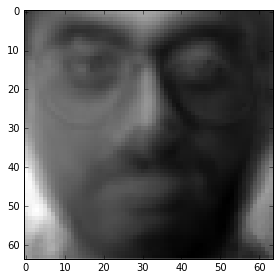

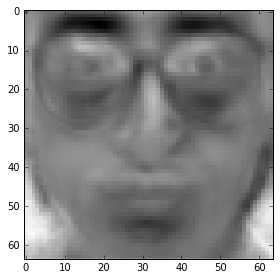

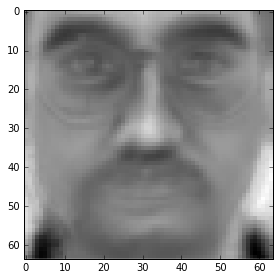

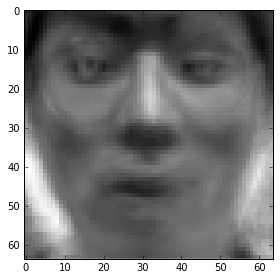

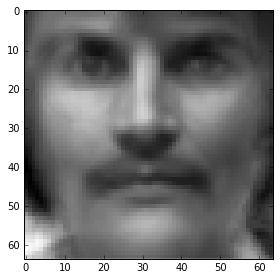

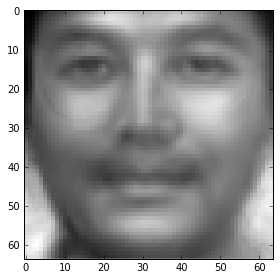

***********************************************
15


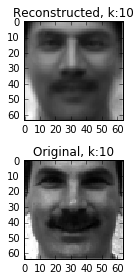

-------------------------------------------------------------
17


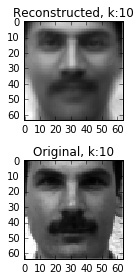

-------------------------------------------------------------
18


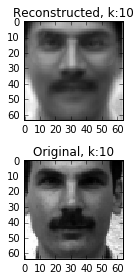

-------------------------------------------------------------
19


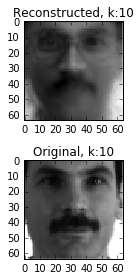

-------------------------------------------------------------
110


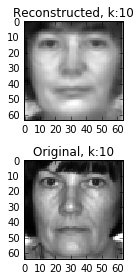

-------------------------------------------------------------
20


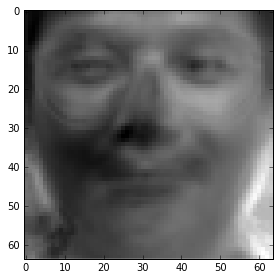

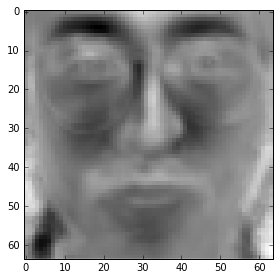

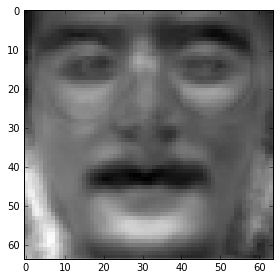

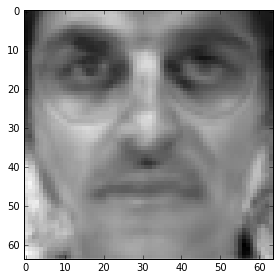

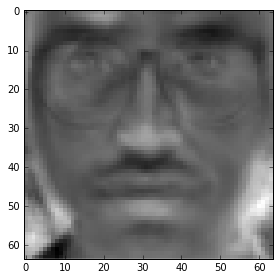

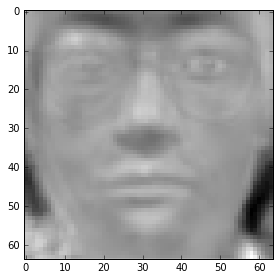

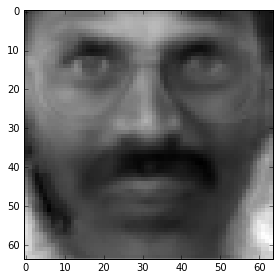

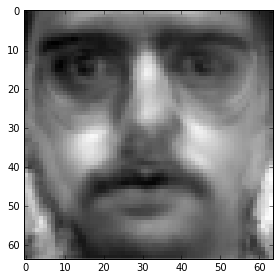

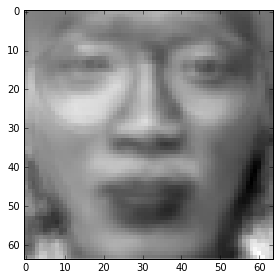

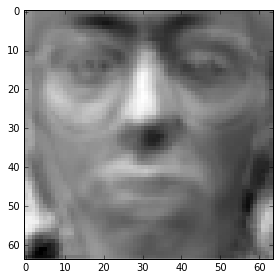

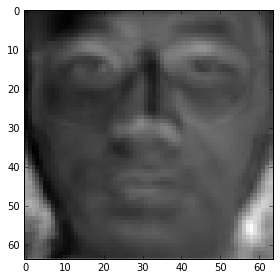

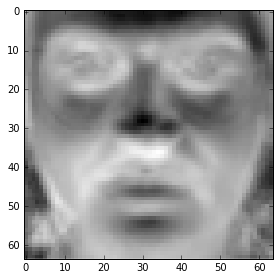

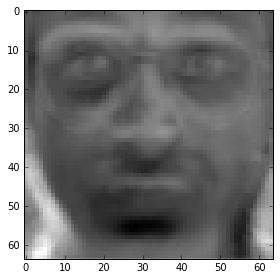

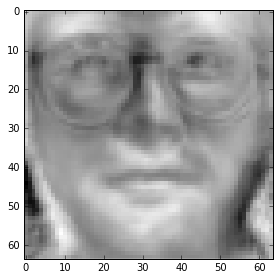

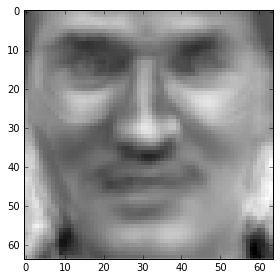

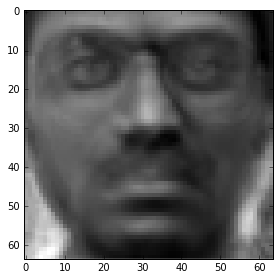

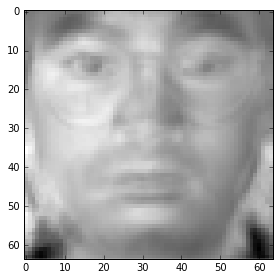

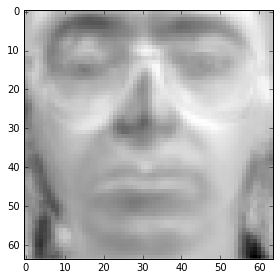

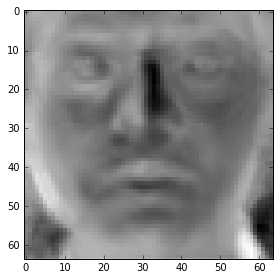

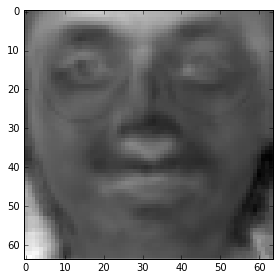

***********************************************
15


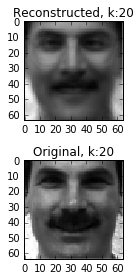

-------------------------------------------------------------
17


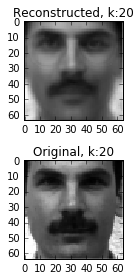

-------------------------------------------------------------
18


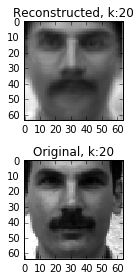

-------------------------------------------------------------
19


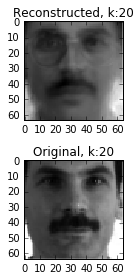

-------------------------------------------------------------
110


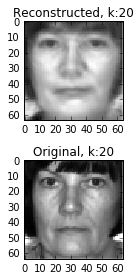

-------------------------------------------------------------
30


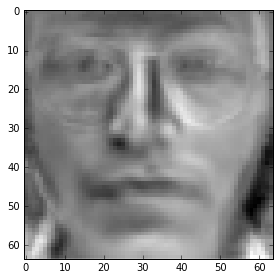

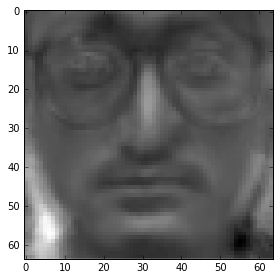

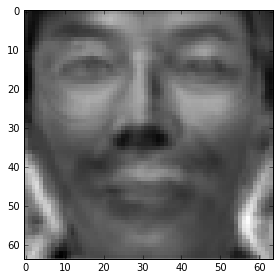

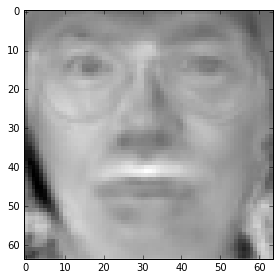

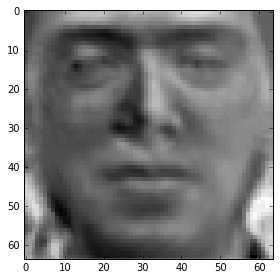

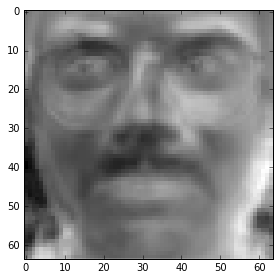

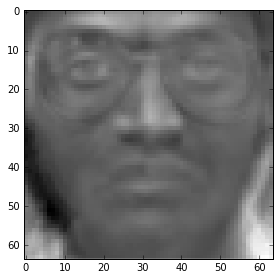

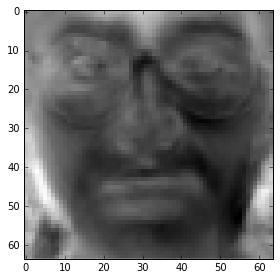

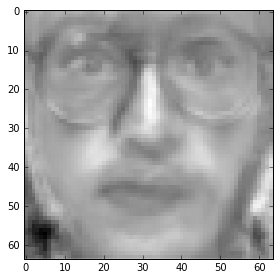

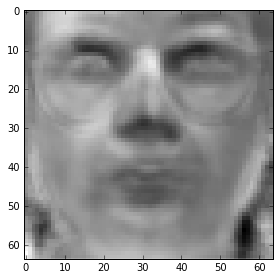

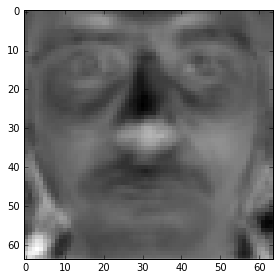

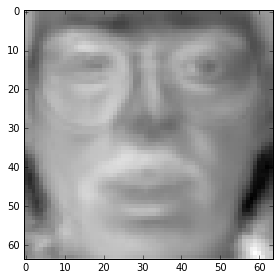

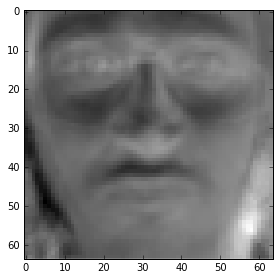

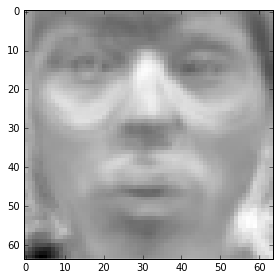

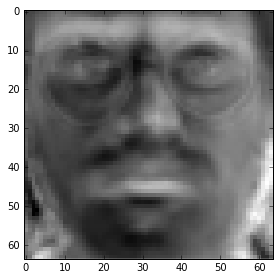

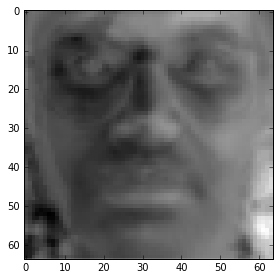

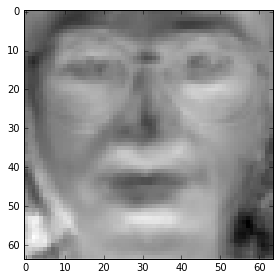

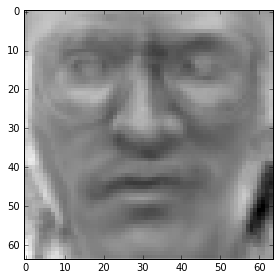

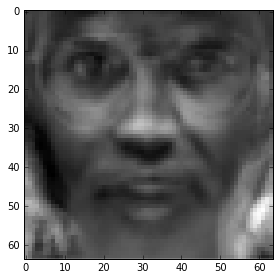

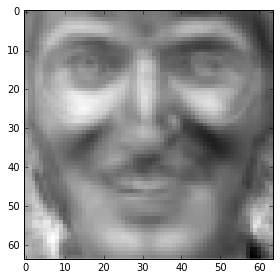

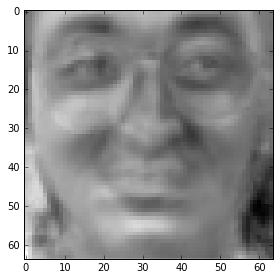

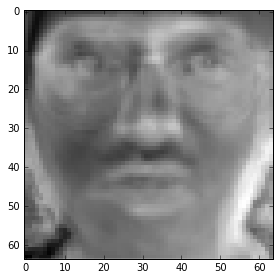

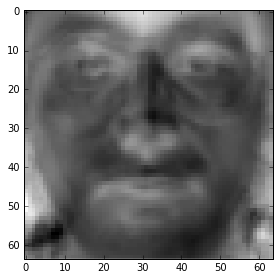

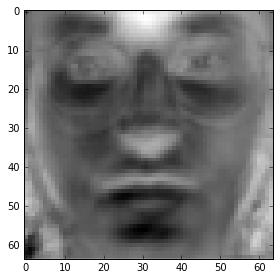

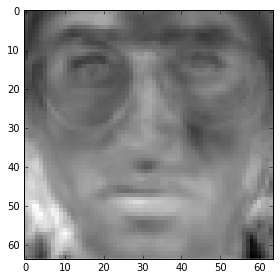

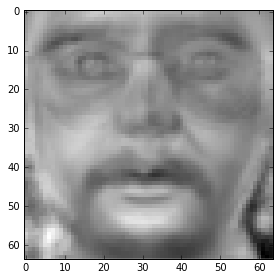

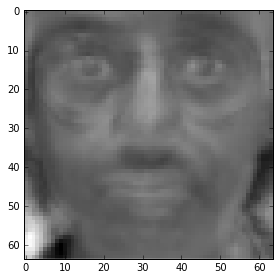

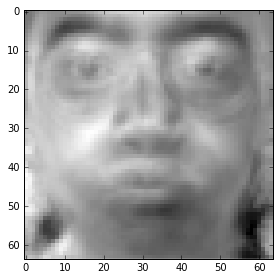

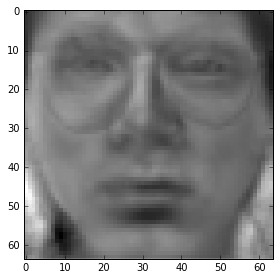

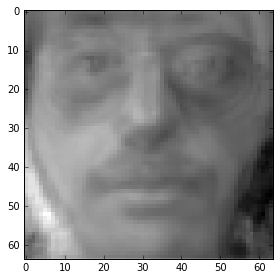

***********************************************
15


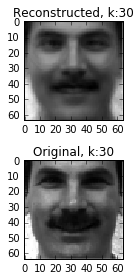

-------------------------------------------------------------
17


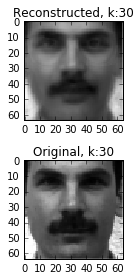

-------------------------------------------------------------
18


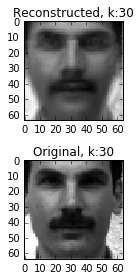

-------------------------------------------------------------
19


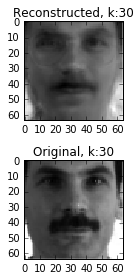

-------------------------------------------------------------
110


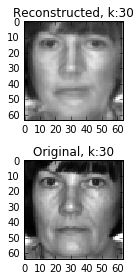

-------------------------------------------------------------
40


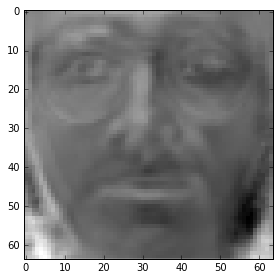

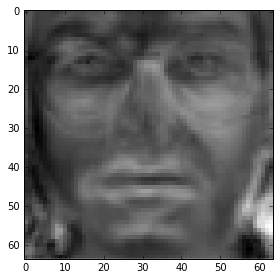

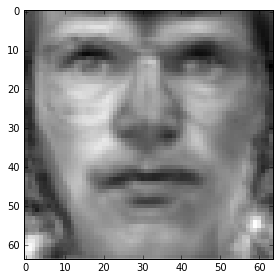

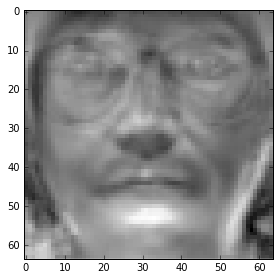

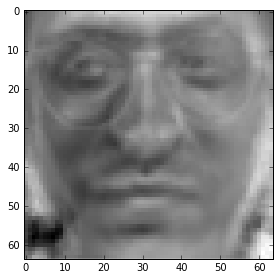

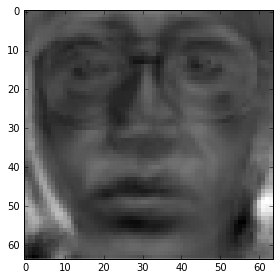

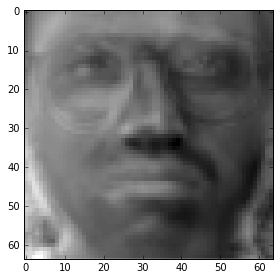

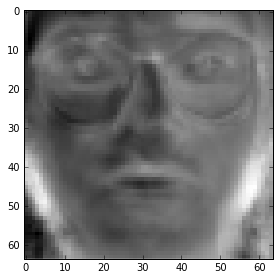

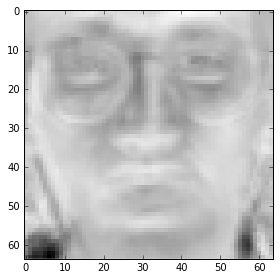

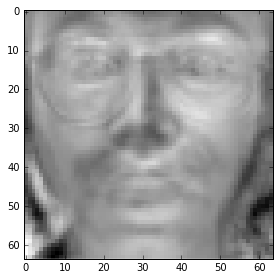

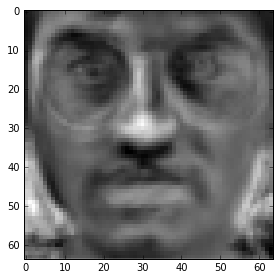

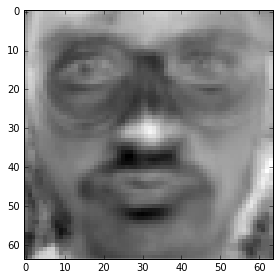

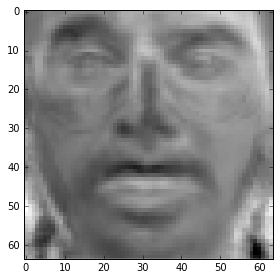

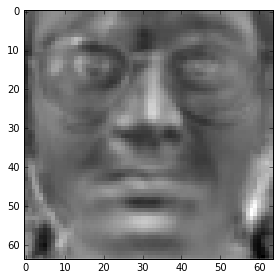

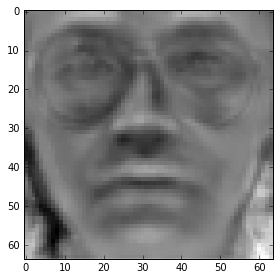

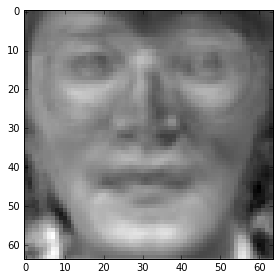

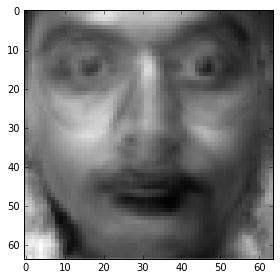

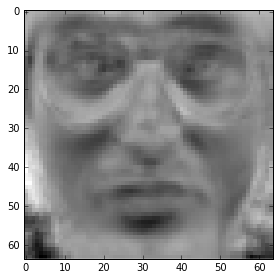

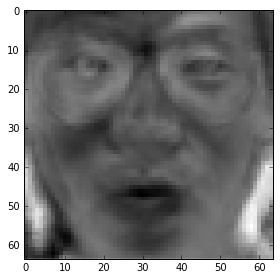

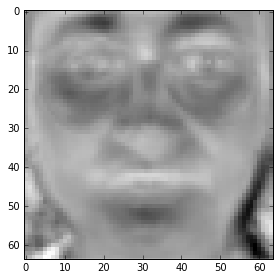

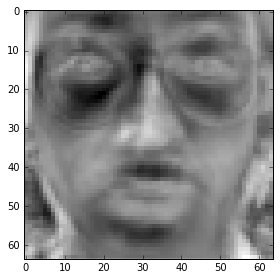

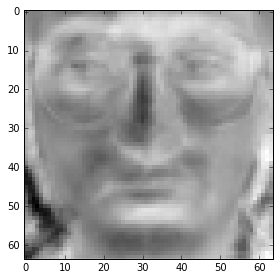

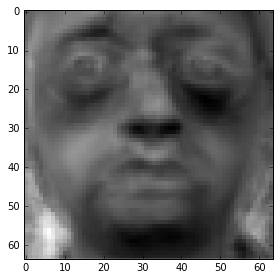

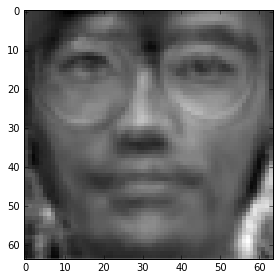

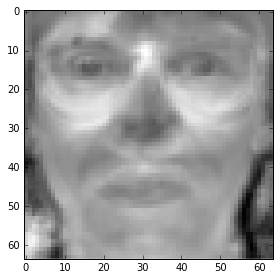

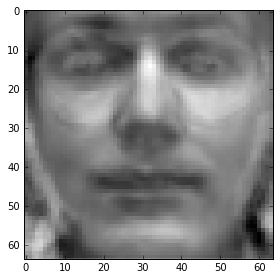

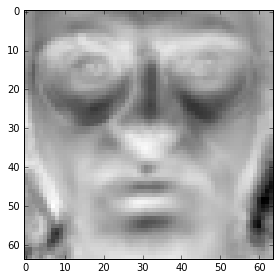

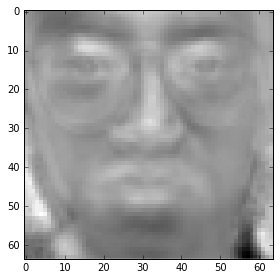

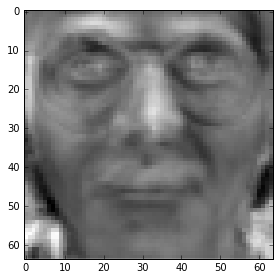

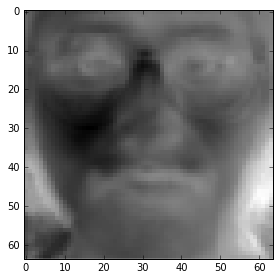

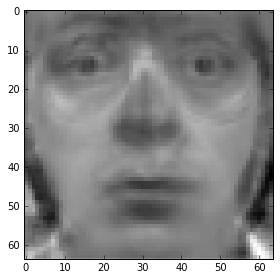

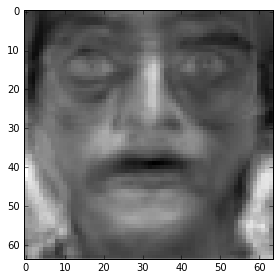

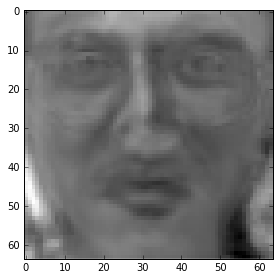

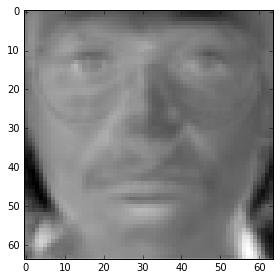

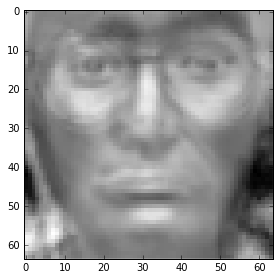

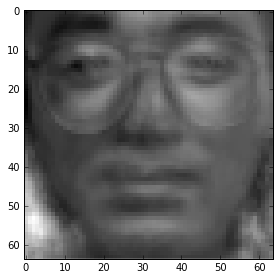

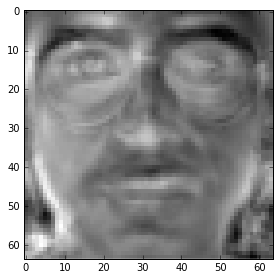

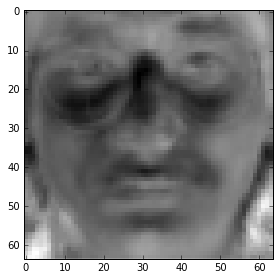

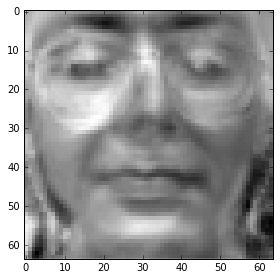

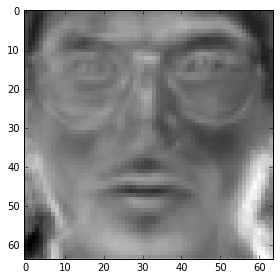

***********************************************
15


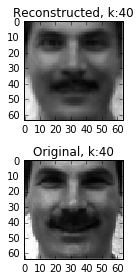

-------------------------------------------------------------
17


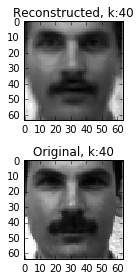

-------------------------------------------------------------
18


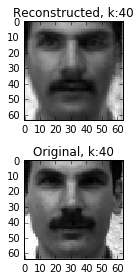

-------------------------------------------------------------
19


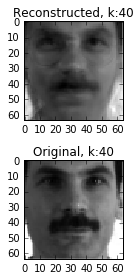

-------------------------------------------------------------
110


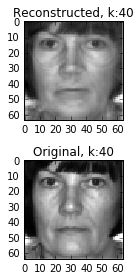

-------------------------------------------------------------
50


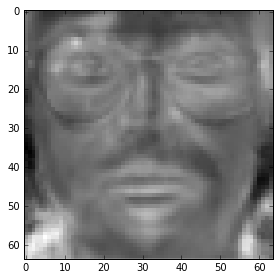

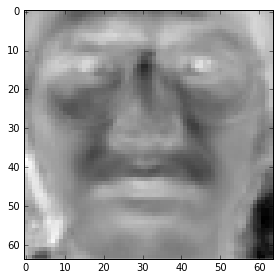

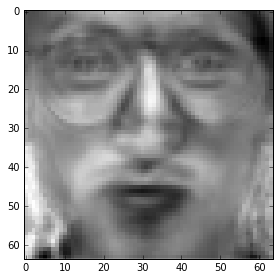

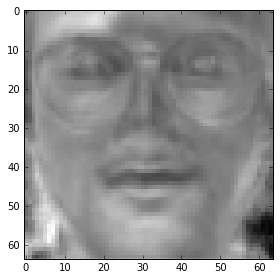

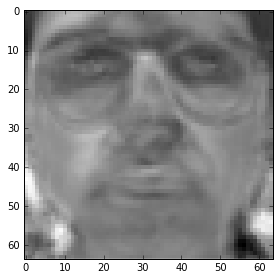

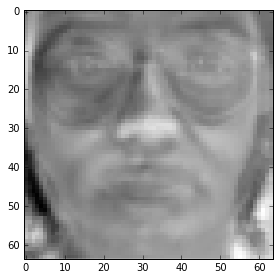

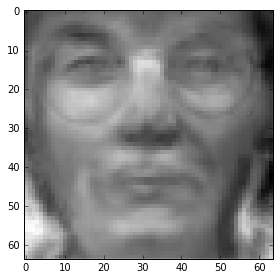

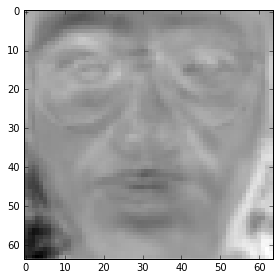

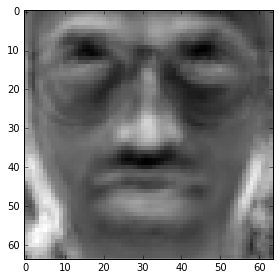

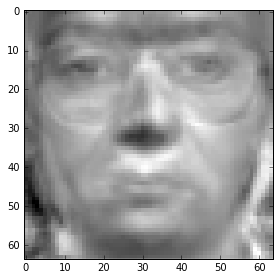

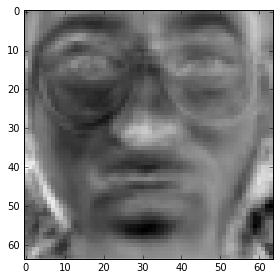

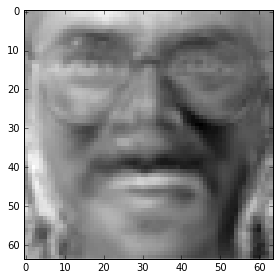

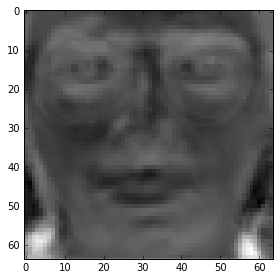

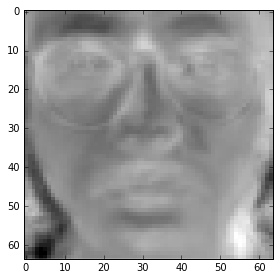

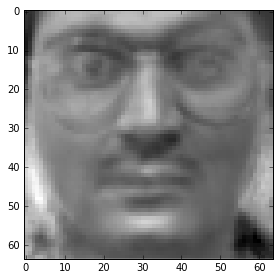

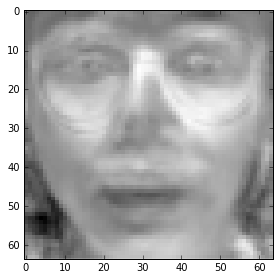

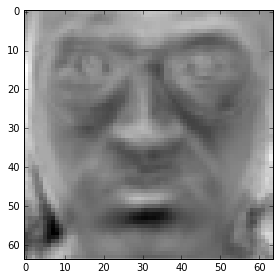

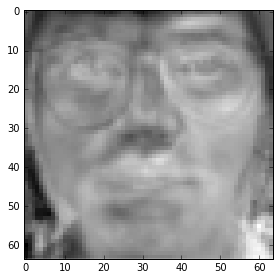

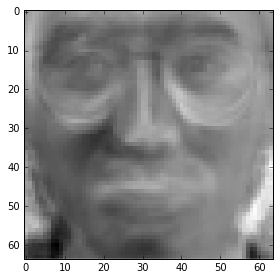

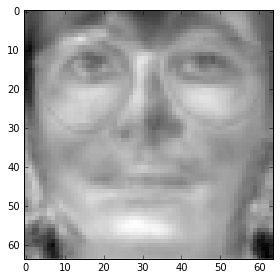

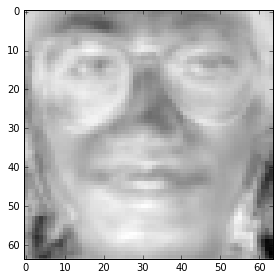

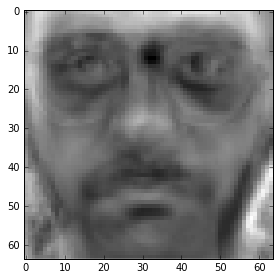

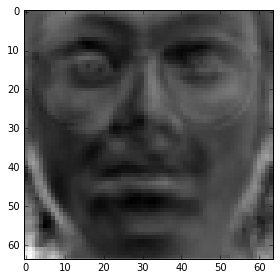

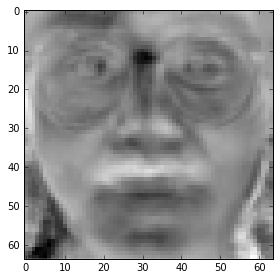

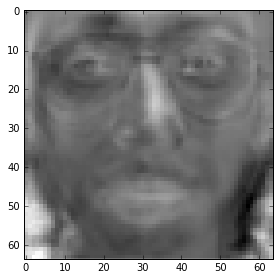

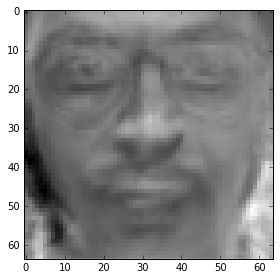

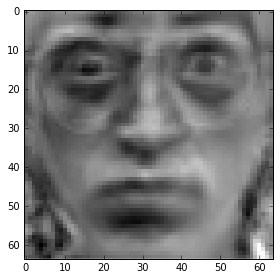

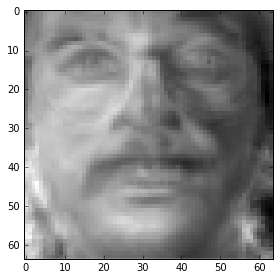

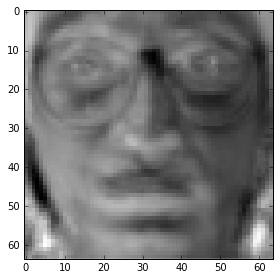

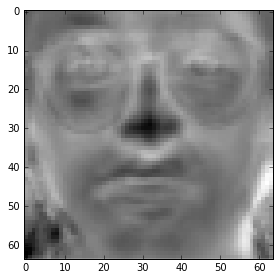

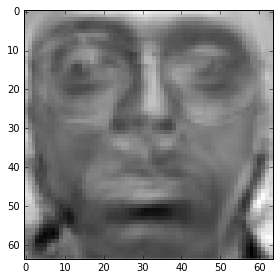

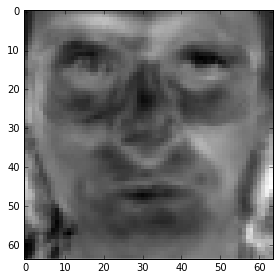

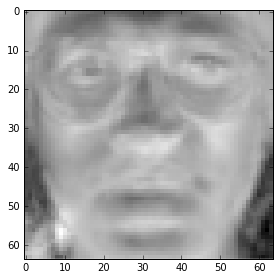

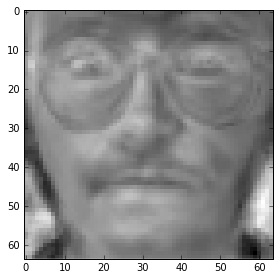

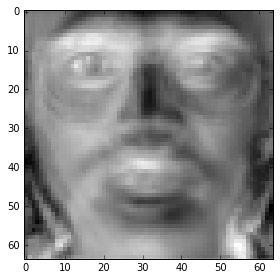

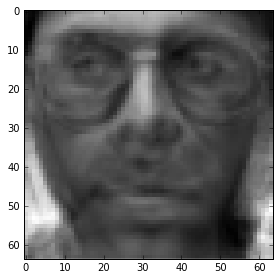

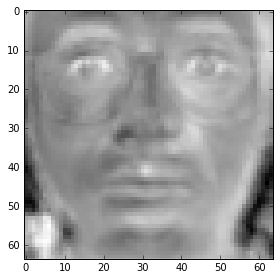

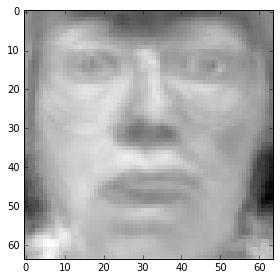

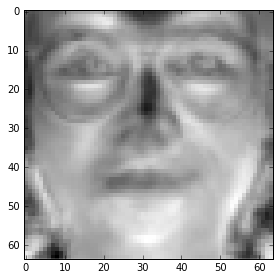

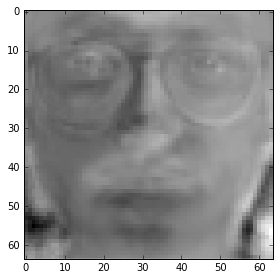

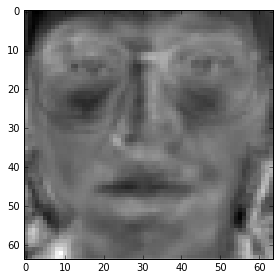

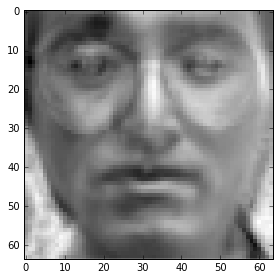

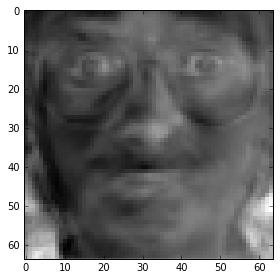

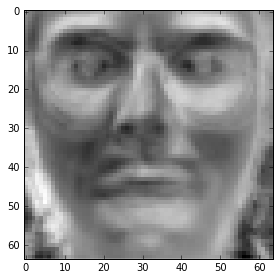

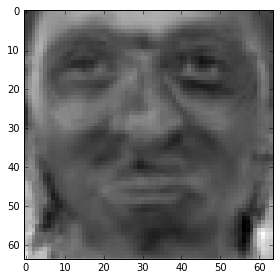

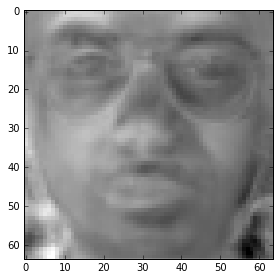

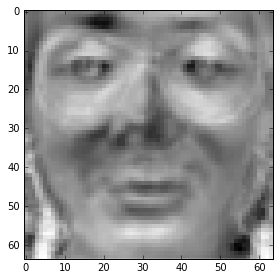

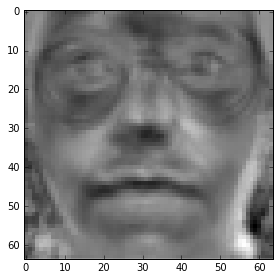

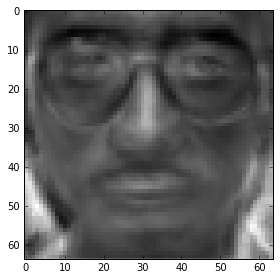

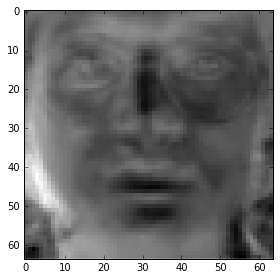

***********************************************
15


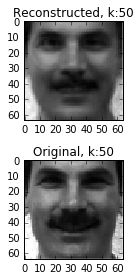

-------------------------------------------------------------
17


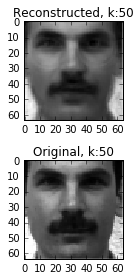

-------------------------------------------------------------
18


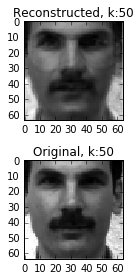

-------------------------------------------------------------
19


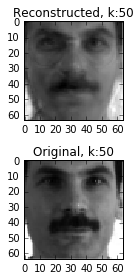

-------------------------------------------------------------
110


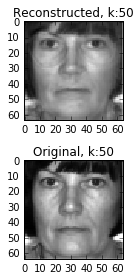

-------------------------------------------------------------
100


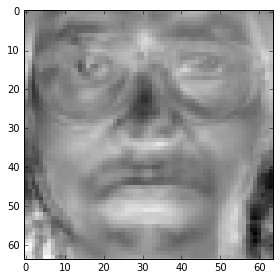

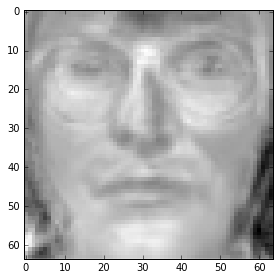

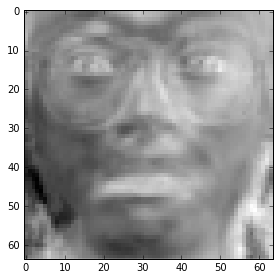

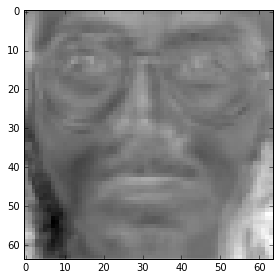

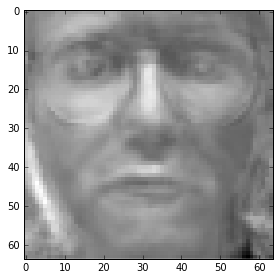

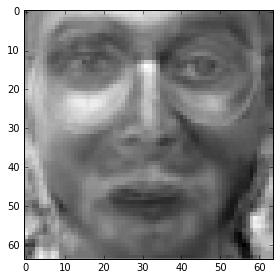

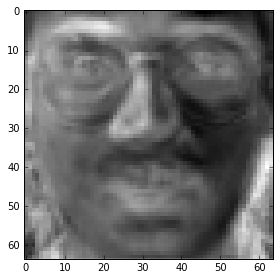

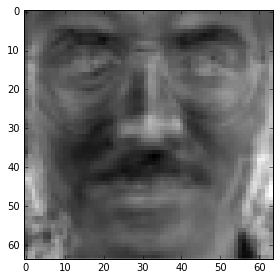

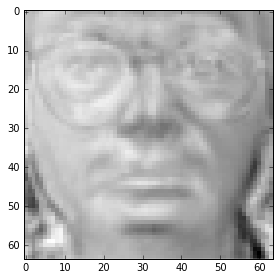

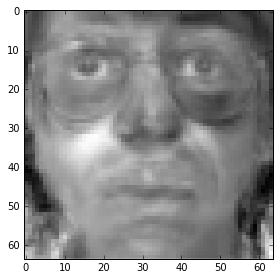

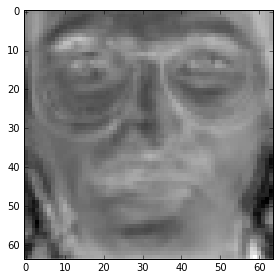

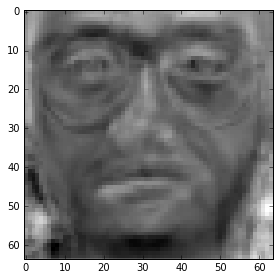

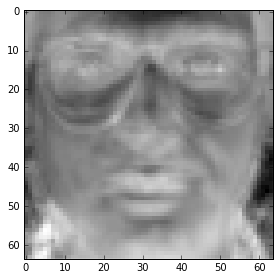

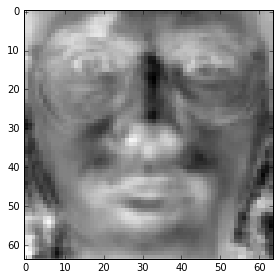

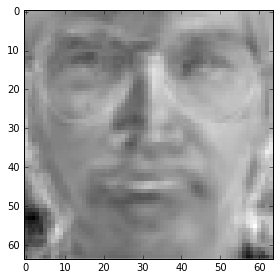

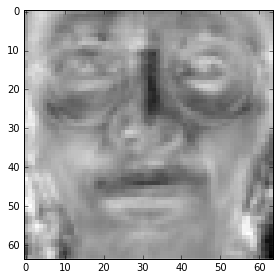

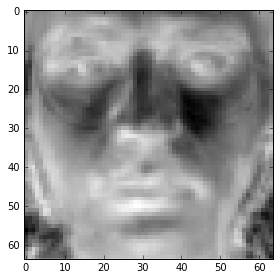

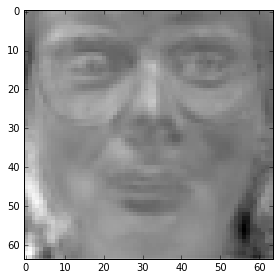

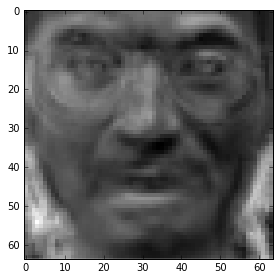

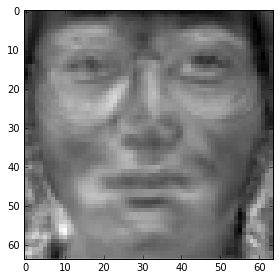

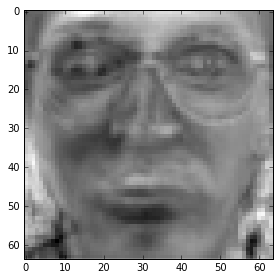

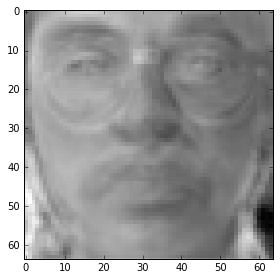

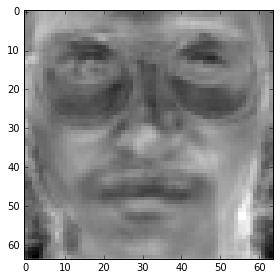

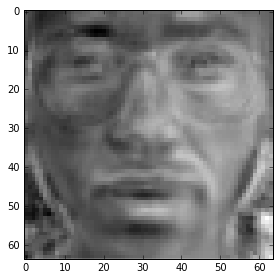

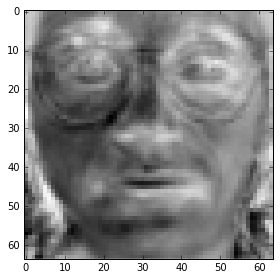

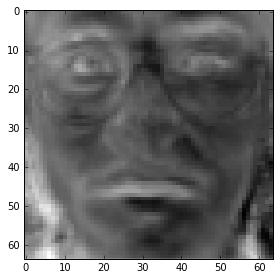

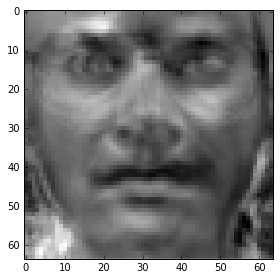

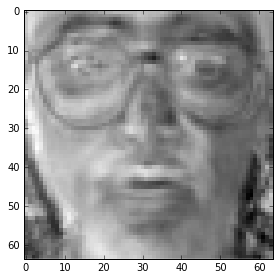

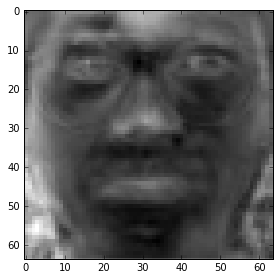

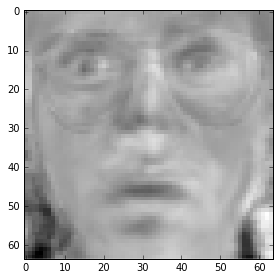

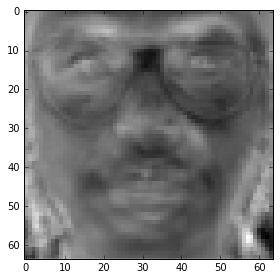

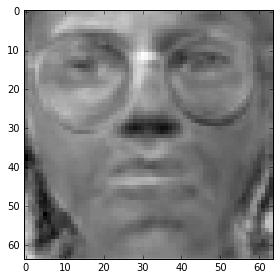

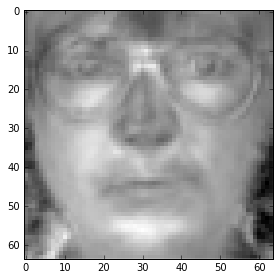

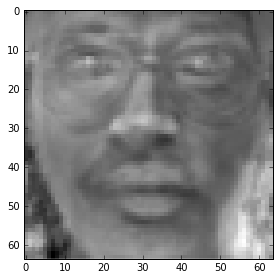

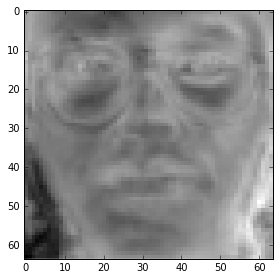

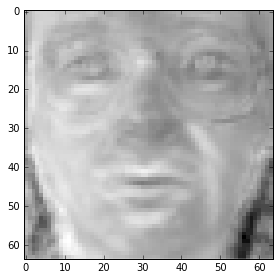

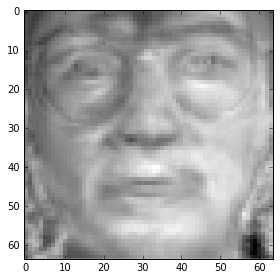

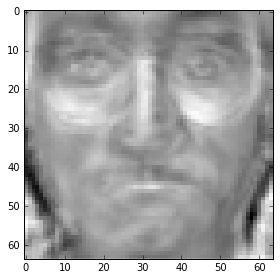

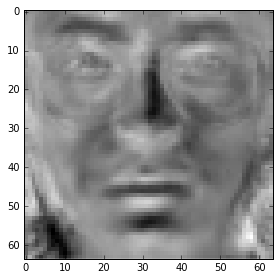

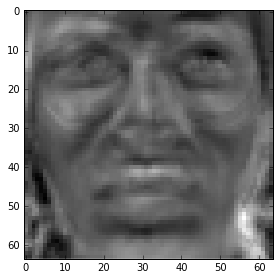

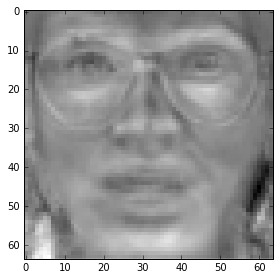

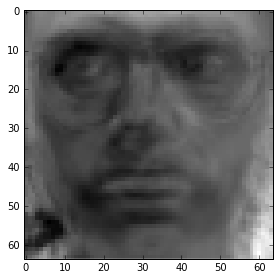

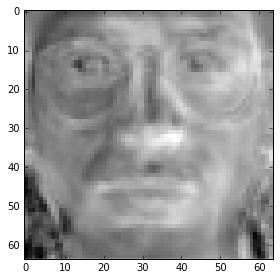

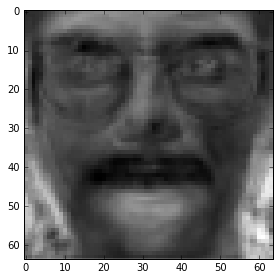

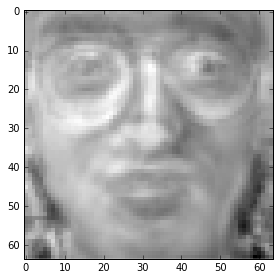

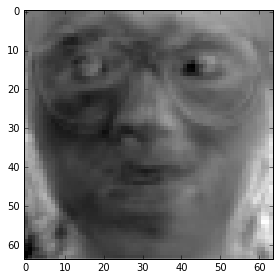

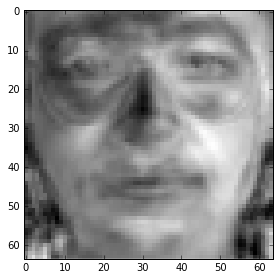

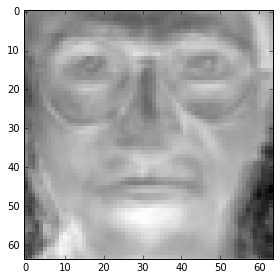

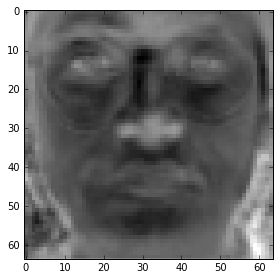

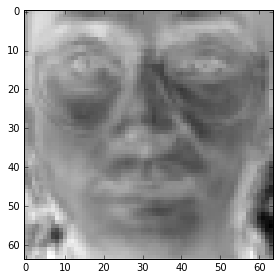

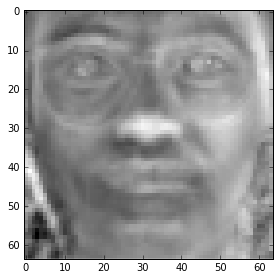

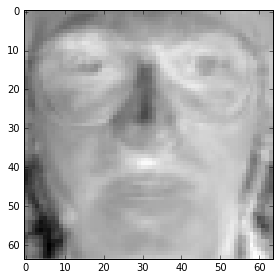

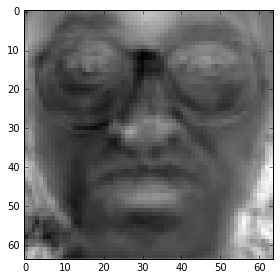

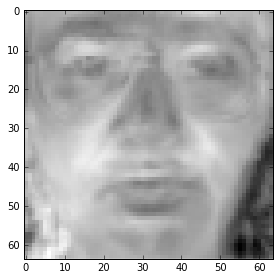

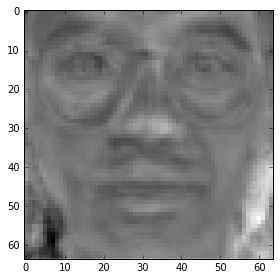

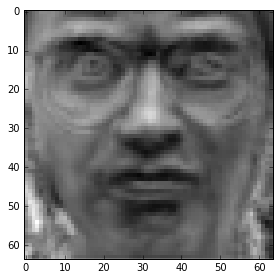

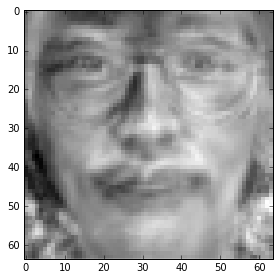

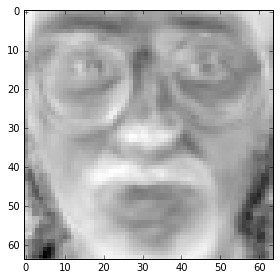

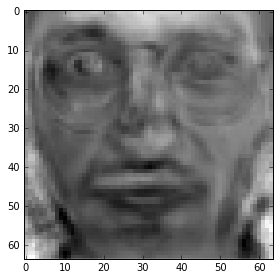

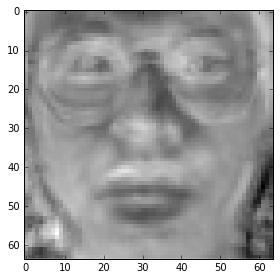

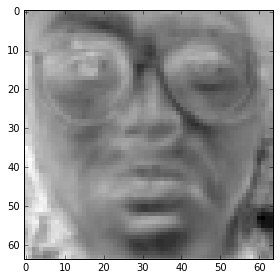

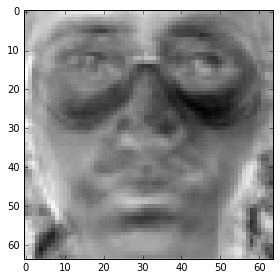

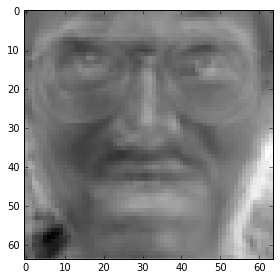

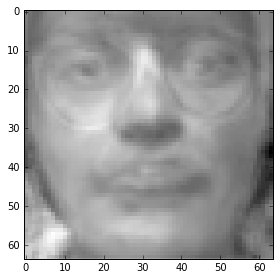

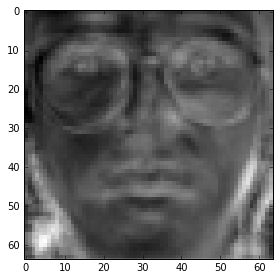

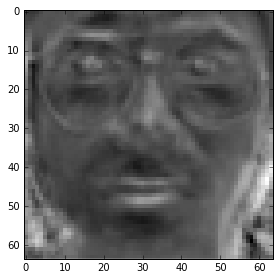

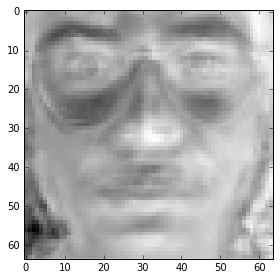

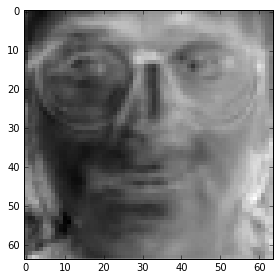

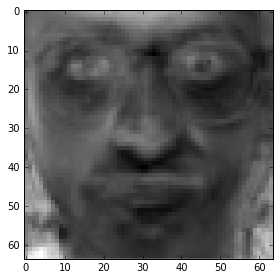

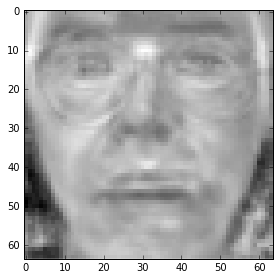

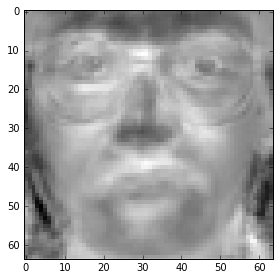

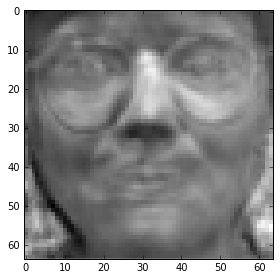

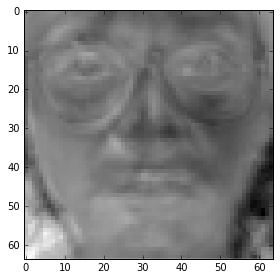

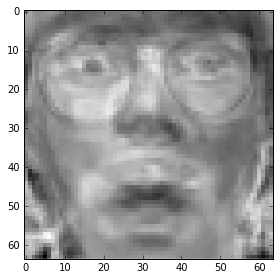

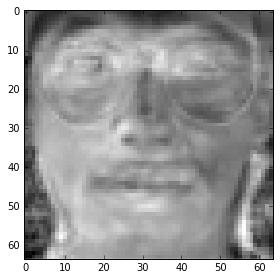

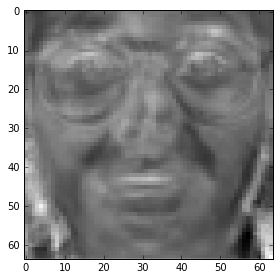

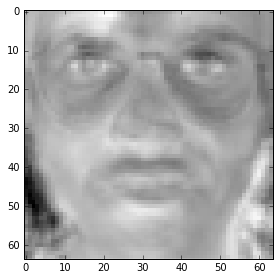

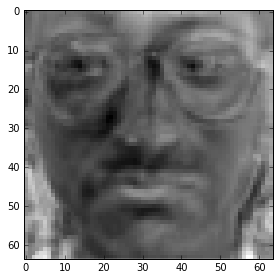

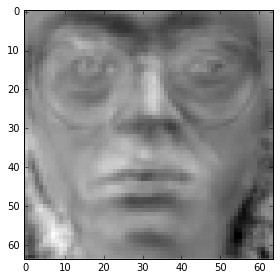

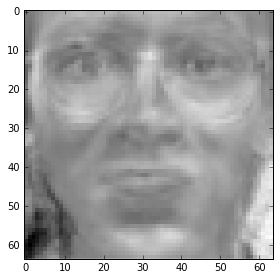

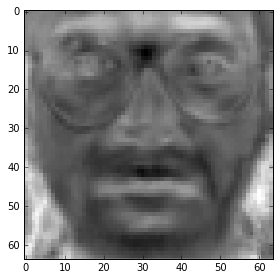

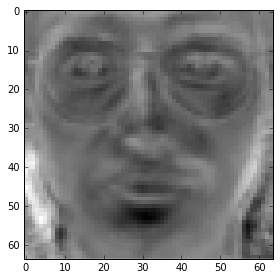

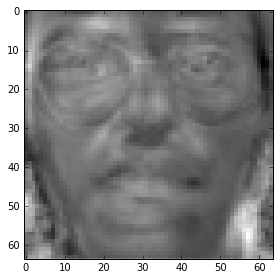

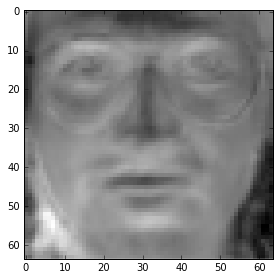

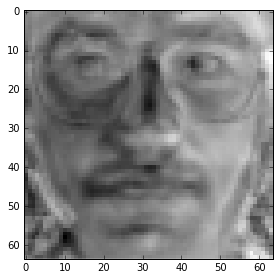

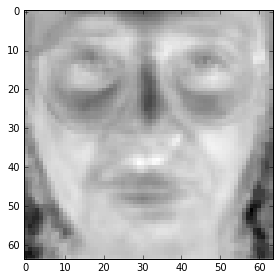

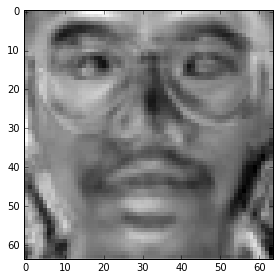

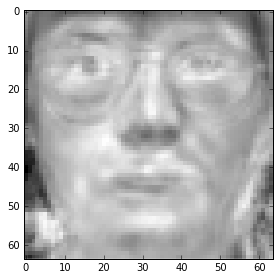

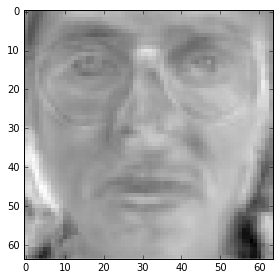

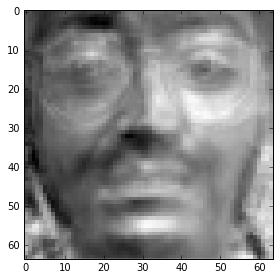

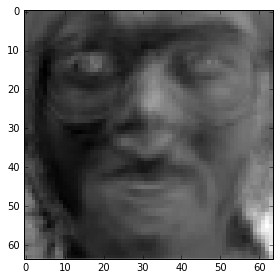

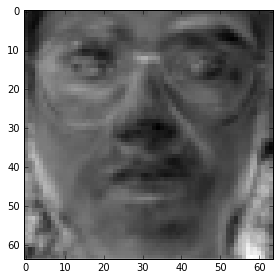

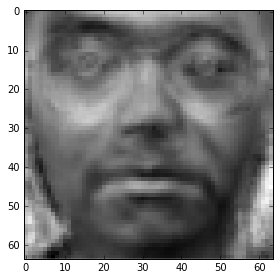

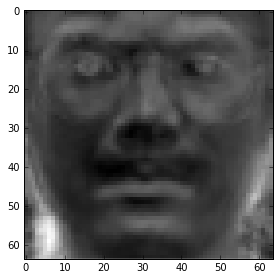

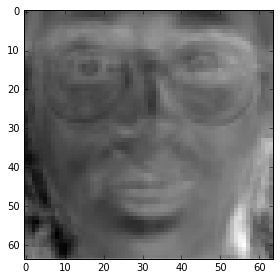

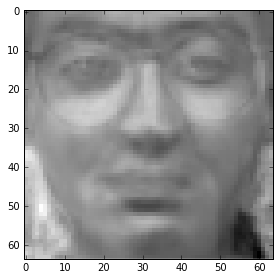

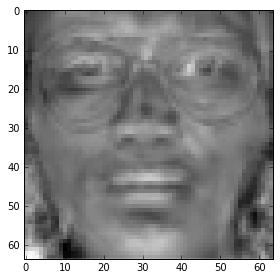

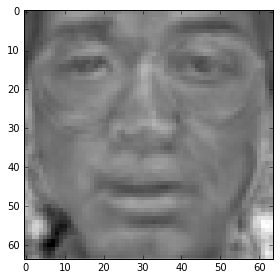

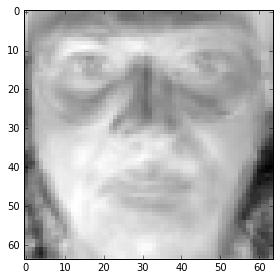

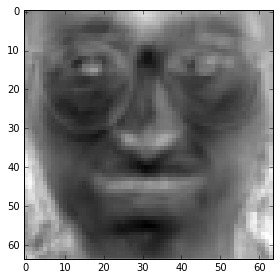

***********************************************
15


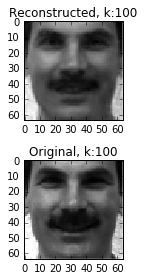

-------------------------------------------------------------
17


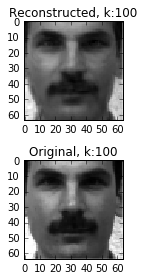

-------------------------------------------------------------
18


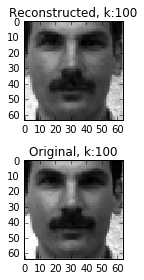

-------------------------------------------------------------
19


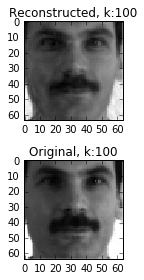

-------------------------------------------------------------
110


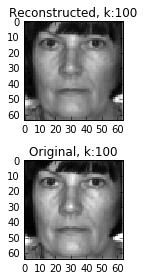

-------------------------------------------------------------


In [64]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
df=pd.read_pickle('facedata_py2_3.pkl')
#print(df['X'])
X=df['X']
m=X[0].reshape(64,64)
print(X.shape)
#from matplotlib import pyplot as plt
#plt.imshow(np.array(m), interpolation='none')
#plt.show()
n=X.shape[0]
k=20
r=[10,20, 30, 40, 50, 100]
for k in r:
    print(k)
    d=X.shape[1]
    Z=np.random.randint(5,size=(n,k))
    W=np.random.randint(5,size=(d,k))
    for epochs in range(100):
        f=np.matmul(Z.T,Z)
        g=np.matmul(Z.T,X)
        h=np.linalg.inv(f)
        W_t=np.matmul(h,g)
        W=W_t.T
        #print(W.shape)
        a=np.matmul(W_t,W)
        b=np.matmul(X,W)
        #d=np.matmul(X.T,W)
        c=np.linalg.inv(a)
        Z=0.5*np.matmul(b,c)
    l=[15,17,18,19,110]
    #print(W.shape)
    #print(Z.shape)
    pathlib.Path('plots/k_'+str(k)+'/image').mkdir(parents=True)
    pathlib.Path('plots/k_'+str(k)+'/basis').mkdir(parents=True)
    for v in range(k):
            w=W_t[v].reshape(64,64)
            plt.imshow(np.array(w.T),cmap='gray', interpolation='none')
            plt.tight_layout()
            fig1 = plt.gcf()
            plt.show()
            plt.draw()
           
            fig1.savefig('plots/k_'+str(k)+'/basis/'+str(v+1)+'_k'+str(k)+'.png')
    print("***********************************************")
    mu=np.mean(X)
    z_l=Z[5].reshape(k,1)
    #print(z_l.shape)
    for i in l:
       # print(Z[i].shape)
        z_l=Z[i].reshape(k,1)
        x_c=mu+np.matmul(W,z_l)
        #print(x_c.shape)
        #w=W[].reshape(64,64)
        
        y=X[i].reshape(64,64)
        m=x_c.reshape(64,64)
        #print(W.shape)
        print(i)
        plt.subplot(2, 1, 1)
        plt.title('Reconstructed, k:'+str(k))
        plt.imshow(np.array(m.T),cmap='gray',interpolation='none')
        plt.subplot(2, 1, 2)
        plt.title('Original, k:'+str(k))
        plt.imshow(np.array(y.T),cmap='gray', interpolation='none')
        plt.tight_layout()
        fig1 = plt.gcf()
        plt.show()
        plt.draw()
        
        fig1.savefig('plots/k_'+str(k)+'/image/l'+str(i+1)+'_k'+str(k)+'.png')
        print("-------------------------------------------------------------")
       